In [175]:
import pandas as pd 
import math
import numpy as np
import matplotlib.pyplot as plt 

df = pd.read_csv('/Users/apple/Desktop/MetroPT3(AirCompressor) 2.csv')

#print(df)
df.shape

(1516948, 17)

About Dataset ( MetroPT3 )

This MetroPT-3 Dataset includes values from the Air Production Unit (APU) of a compressor in a metro train, as well as readings from pressure, temperature, motor current, and air intake valves. This dataset demonstrates actual issues in predictive maintenance faced by the sector.It is made up of multivariate time series data collected from various analogue and digital sensors mounted on a train's compressor.

In [176]:
df.columns

Index(['Unnamed: 0', 'timestamp', 'TP2', 'TP3', 'H1', 'DV_pressure',
       'Reservoirs', 'Oil_temperature', 'Motor_current', 'COMP', 'DV_eletric',
       'Towers', 'MPG', 'LPS', 'Pressure_switch', 'Oil_level',
       'Caudal_impulses'],
      dtype='object')

Columns Present :

1. TP2 (bar) – the measure of the pressure on the compressor. 

2. TP3 (bar) – the measure of the pressure generated at the pneumatic panel.

3. H1 (bar) – the measure of the pressure generated due to pressure drop when the discharge of the 
              cyclonic separator filter occurs.

4. DV pressure (bar) – the measure of the pressure drop generated when the towers discharge air
                       dryers ; a zero reading indicates that the compressor is operating under load.

5. Reservoirs (bar) – the measure of the downstream pressure of the reservoirs, which should be
                      close to the pneumatic panel pressure (TP3). 

6. Motor Current (A) – the measure of the current of one phase of the three-phase motor; it  
                       presents values close to 0A - when it turns off, 4A - when working offloaded, 7A - when working under load, and 9A - when it starts working.

7. Oil Temperature (ºC) – the measure of the oil temperature on the compressor.

8. COMP - the electrical signal from the compressor's air intake valve. When there is no air 
          intake, the compressor is either off or running in an offloaded mode, as shown by the electrical signal being active.

9. DV electric - the electrical signal that regulates the output valve of the compressor; it is
                 active when the compressor is working under load and inactive when the compressor is off or working in an unloaded state.

10. TOWERS - the electrical signal that designates the towers in charge of drying the air and
             draining the moisture from it; while it is inactive, it designates tower one as being in operation; when it is active, it designates tower two as being in operation.

11. MPG - when the air production unit (APU) pressure drops below 8.2 bar, an electrical signal
          opens the intake valve, beginning the compressor under load. This electrical signal also activates the COMP sensor, which behaves similarly to the MPG sensor.

12. LPS - the electrical signal that detects and activates when the pressure drops below 7 bars.

13. Pressure Switch - the electrical signal that detects the discharge in the air-drying towers.

14. Oil level - the electrical signal that detects the oil level on the compressor; it is active
                when the oil is below the expected values.

15. Caudal Impulse - the electrical signal that counts the pulse outputs generated by the absolute 
                     amount of air flowing from the APU to the reservoirs.

In [177]:
df.dtypes

Unnamed: 0           int64
timestamp           object
TP2                float64
TP3                float64
H1                 float64
DV_pressure        float64
Reservoirs         float64
Oil_temperature    float64
Motor_current      float64
COMP               float64
DV_eletric         float64
Towers             float64
MPG                float64
LPS                float64
Pressure_switch    float64
Oil_level          float64
Caudal_impulses    float64
dtype: object

<Axes: >

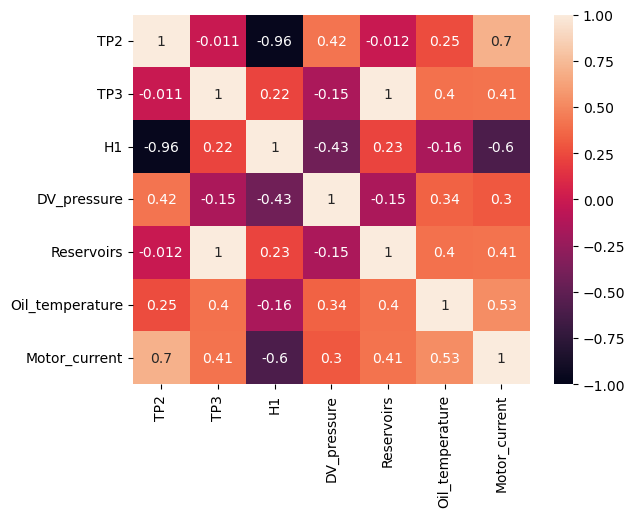

In [178]:
import seaborn as sns
new_df = df[["TP2", "TP3", "H1", "DV_pressure",
       "Reservoirs", "Oil_temperature", "Motor_current"]]
sns.heatmap(data=new_df.corr(),annot = True , vmin = -1 , vmax = 1)


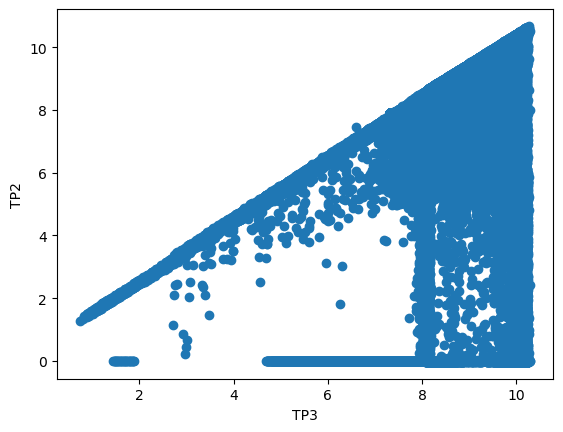

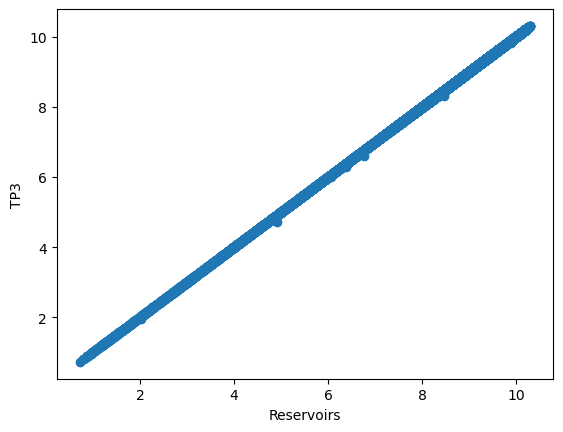

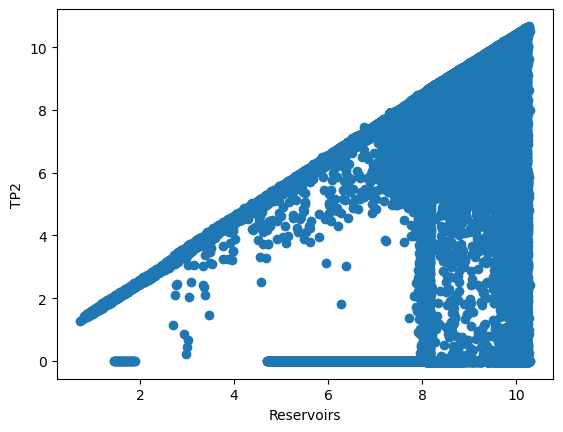

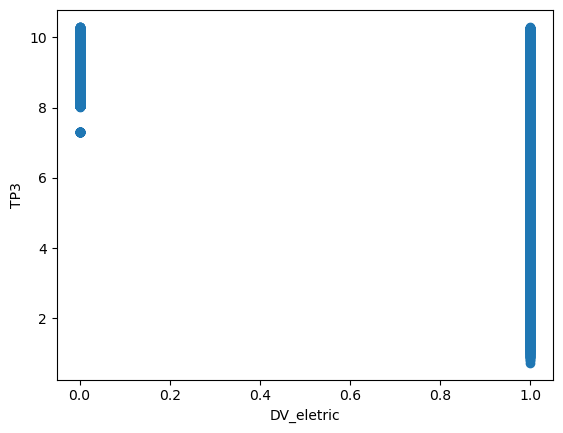

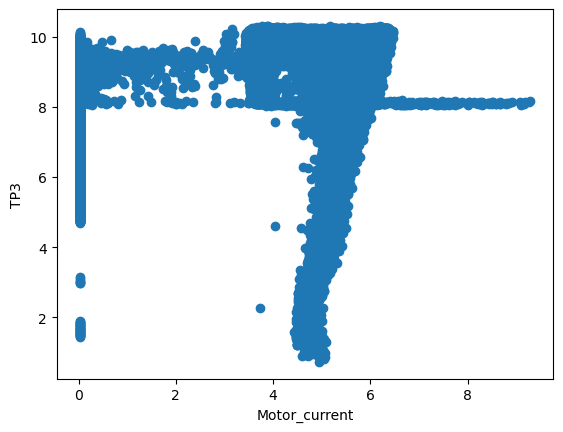

In [179]:
x1 = np.array(df["TP3"])
y1 = np.array(df["TP2"])

x2 = np.array(df["Reservoirs"])
y2 = np.array(df["TP3"])

x3 = np.array(df["Reservoirs"])
y3 = np.array(df["TP2"])

x4 = np.array(df["DV_eletric"])
y4 = np.array(df["TP3"])

x5 = np.array(df["Motor_current"])
y5 = np.array(df["TP3"])

plt.scatter(x1,y1)
plt.xlabel("TP3")
plt.ylabel("TP2")
plt.show()

plt.scatter(x2,y2)
plt.xlabel("Reservoirs")
plt.ylabel("TP3")
plt.show()

plt.scatter(x3,y3)
plt.xlabel("Reservoirs")
plt.ylabel("TP2")
plt.show()

plt.scatter(x4,y4)
plt.xlabel("DV_eletric")
plt.ylabel("TP3")
plt.show()

plt.scatter(x5,y5)
plt.xlabel("Motor_current")
plt.ylabel("TP3")
plt.show()

In [180]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression as lr

X1 = df[["TP2","TP3"]]   # Independent Variables   
Y1 =  df["Reservoirs"]  # Dependent Variable / Target Variable

X_train1 , X_test1 , Y_train1 , Y_test1 = train_test_split(X1,Y1,test_size = 0.2 , random_state = 42)


In [181]:


model = lr()

model.fit(X_train1 , Y_train1)

Y_pred1 = model.predict(X_test1)



In [182]:
from sklearn.metrics import r2_score as re, mean_squared_error as mse, mean_absolute_error as mae

r_squarred1 = re(Y_test1,Y_pred1)

MSE1 = mse(Y_test1,Y_pred1)

MAE1 = mae(Y_test1,Y_pred1)

print("r-squarred",r_squarred1)

print("mean-squarred-error",MSE1)

print("mean-absolute-error",MAE1)




r-squarred 0.9999882645842181
mean-squarred-error 4.781318020190002e-06
mean-absolute-error 0.0016460213315222033


Text(0.5, 1.0, 'Reservoirs Actual Value VS Reservoirs Predicted Value')

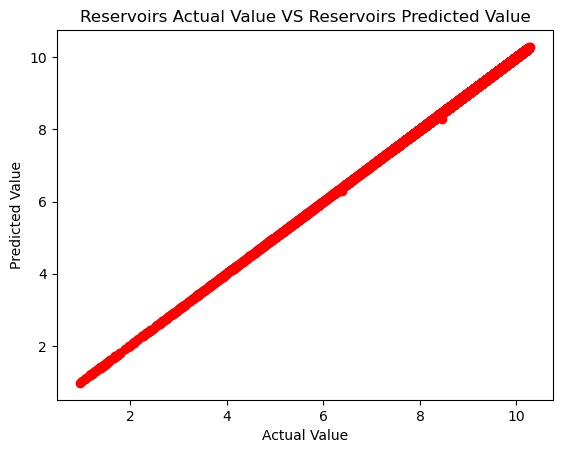

In [183]:
plt.scatter(Y_test1,Y_pred1,c = 'red')

plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.title("Reservoirs Actual Value VS Reservoirs Predicted Value")

Model - 1 :

Independent Variables :- 

1. TP2
2. TP3

Dependent Variables :- 

1. Reservoirs

Used Model :- Linear Regression

<br>
R_squarred :- 0.9999882645842181
<br>

Mean_Squarred_Error :- 4.781318020190002e-06
<br>

Mean_Absolute_Error :- 0.0016460213315222033

In [184]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression as lr

X2 = df[["Motor_current","DV_pressure"]]   # Independent Variables   
Y2 =  df["TP3"]  # Dependent Variable / Target Variable

X_train2 , X_test2 , Y_train2 , Y_test2 = train_test_split(X2,Y2,test_size = 0.2 , random_state = 42)


In [185]:
model = lr()

model.fit(X_train2 , Y_train2)

Y_pred2 = model.predict(X_test2)

In [186]:
from sklearn.metrics import r2_score as re, mean_squared_error as mse, mean_absolute_error as mae

r_squarred2 = re(Y_test2,Y_pred2)

MSE2 = mse(Y_test2,Y_pred2)

MAE2 = mae(Y_test2,Y_pred2)

print("r-squarred",r_squarred2)

print("mean-squarred-error",MSE2)

print("mean-absolute-error",MAE2)

r-squarred 0.2555210962466776
mean-squarred-error 0.30407876269274164
mean-absolute-error 0.4143633735584444


Text(0.5, 1.0, 'TP3 Actual Value VS TP3 Predicted Value')

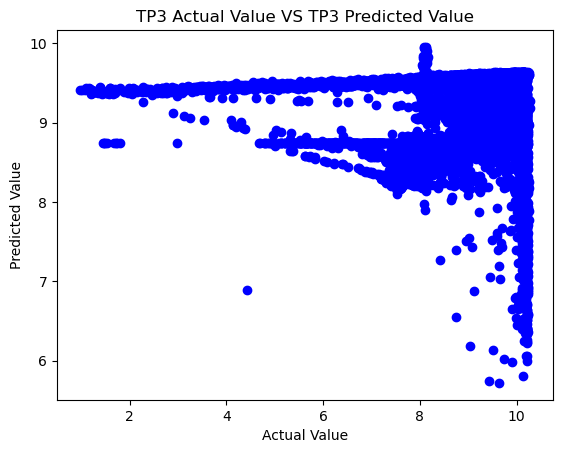

In [187]:
plt.scatter(Y_test2,Y_pred2,c = 'blue')

plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.title("TP3 Actual Value VS TP3 Predicted Value")

Model - 2 :

Independent Variables :- 

1. Motor Current
2. DV Electric

Dependent Variables :- 

1. TP3

Used Model :- Linear Regression
<br>

R_squarred :- 0.4245289514077746
<br>

Mean_Squarred_Error :- 0.23504833184554505
<br>

Mean_Absolute_Error :- 0.35940411833881863

In [188]:
df.shape

(1516948, 17)

In [189]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression as lr

X3 = df[["TP2","TP3","DV_pressure","H1","Reservoirs"]]   # Independent Variables   
Y3 =  df["Oil_temperature"]  # Dependent Variable / Target Variable

X_train3 , X_test3 , Y_train3 , Y_test3 = train_test_split(X3,Y3,test_size = 0.2 , random_state = 42)

In [190]:
model = lr()

model.fit(X_train3 , Y_train3)

Y_pred3 = model.predict(X_test3)

In [191]:
from sklearn.metrics import r2_score as re, mean_squared_error as mse, mean_absolute_error as mae

r_squarred3 = re(Y_test3,Y_pred3)

MSE3 = mse(Y_test3,Y_pred3)

MAE3 = mae(Y_test3,Y_pred3)

print("r-squarred",r_squarred3)

print("mean-squarred-error",MSE3)

print("mean-absolute-error",MAE3)

r-squarred 0.33713802562574857
mean-squarred-error 28.056626365401595
mean-absolute-error 4.2588908429309615


Text(0.5, 1.0, 'Reservoirs Actual Value VS Reservoirs Predicted Value')

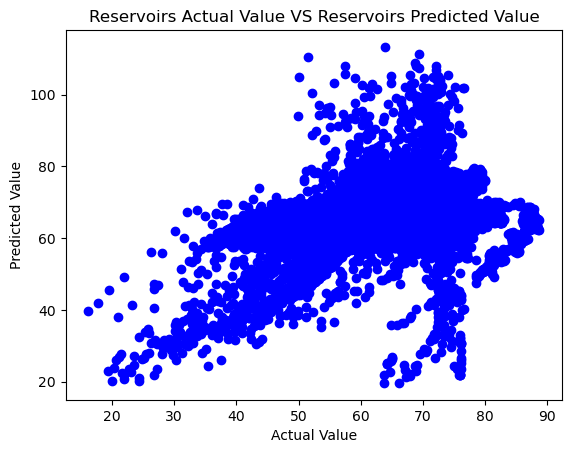

In [192]:
plt.scatter(Y_test3,Y_pred3,c = 'blue')

plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.title("Reservoirs Actual Value VS Reservoirs Predicted Value")

Model :- 1
<br>

Independent Variables :- 

1. TP2
2. TP3
3. H1
4. Reservoirs


Dependent Variable :- 

1. DV_pressure

In [193]:
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, GridSearchCV
from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler

In [194]:
data_df = df[["TP2","TP3","Reservoirs","H1"]]
X_train, X_test, y_train, y_test = train_test_split(data_df, df["DV_pressure"], random_state=42, test_size=0.20)

size_scaler = RobustScaler().fit(X_train)
X_train_scaled = size_scaler.transform(X_train)
X_test_scaled = size_scaler.transform(X_test)
X_train_scaled.shape, X_test_scaled.shape


((1213558, 4), (303390, 4))

In [195]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Models-------------------------
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor


In [196]:
model_dict = {
    'LinearRegression': {"model": LinearRegression(), "params": {}},
    'RandomForestRegressor': {"model": RandomForestRegressor(random_state=42),
                     "params": {'n_estimators': list(range(5, 50, 5)), 'max_depth': list(range(1, 10, 2))}},
    'XGBRegressor': {"model": XGBRegressor(), "params": {'n_estimators': list(range(10, 800, 100)), 'learning_rate': [0.001, 0.01, 0.1]}}
}

In [197]:
def eval_models():
    model_results = pd.DataFrame()
    model_results['r_score'] = None
    model_results['Train_RMSE'] = None
    model_results['Test_RMSE'] = None
    model_results['Train_MAE'] = None
    model_results['Test_MAE'] = None
    model_results['best_params'] = None

    best_reg_model_ours = None
    best_test_score = math.inf

    for model_name, reg_model in model_dict.items():
        classifier = GridSearchCV(reg_model['model'], reg_model['params'], n_jobs=20, verbose=0)
        classifier.fit(X_train_scaled, list(y_train))
        best_model = classifier.best_estimator_

        y_train_predicted = best_model.predict(X_train_scaled)
        train_rmse = np.sqrt(mean_squared_error(list(y_train), y_train_predicted))
        train_mae = mean_absolute_error(list(y_train), y_train_predicted)

        print(model_name, train_rmse, classifier.best_params_)

        y_predicted = best_model.predict(X_test_scaled)
        test_rmse = np.sqrt(mean_squared_error(list(y_test), y_predicted))
        test_mae = mean_absolute_error(list(y_test), y_predicted)
        r_squarred = re(y_test, y_predicted)
        if test_rmse < best_test_score:
            best_test_score = test_rmse
            best_reg_model_ours = best_model

        model_results.loc[model_name, ['r_score','Train_RMSE', 'Test_RMSE', 'Train_MAE', 'Test_MAE', 'best_params']] = [r_squarred,train_rmse, test_rmse, train_mae, test_mae, classifier.best_params_]

    print("Best model: ", best_reg_model_ours)
    # plot the prediction errors using the best model
    y_predicted = best_model.predict(X_test_scaled)
    plt.plot(list(y_test) - y_predicted, marker='o', linestyle='')

    return model_results

LinearRegression 0.33769604788891605 {}
RandomForestRegressor 0.11711815491016463 {'max_depth': 9, 'n_estimators': 45}
XGBRegressor 0.0949997654512043 {'learning_rate': 0.1, 'n_estimators': 410}
Best model:  XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=410, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)


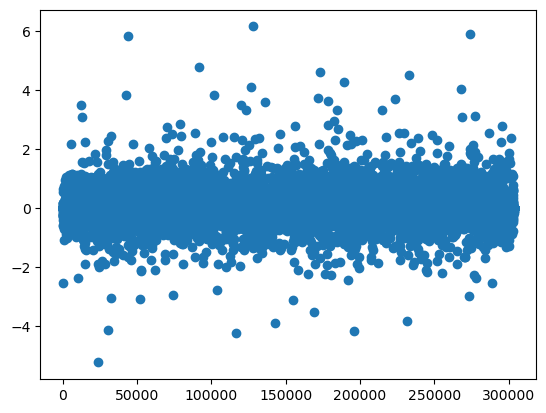

In [198]:
model_results = eval_models()

In [199]:
model_results

,r_score,Train_RMSE,Test_RMSE,Train_MAE,Test_MAE,best_params
LinearRegression,0.218056,0.337696,0.340546,0.153772,0.154505,{}
RandomForestRegressor,0.904413,0.117118,0.119066,0.020953,0.021176,"{'max_depth': 9, 'n_estimators': 45}"
XGBRegressor,0.929369,0.095,0.10235,0.014657,0.015261,"{'learning_rate': 0.1, 'n_estimators': 410}"


Model :- 2
<br>

Independent Variables :- 

1. TP2
2. TP3
3. H1
4. Reservoirs
5. Oil_temperature


Dependent Variable :- 

1. Motor_current

In [200]:
data_df = df[["TP2","TP3","H1","Reservoirs","Oil_temperature"]]
X_train, X_test, y_train, y_test = train_test_split(data_df, df["Motor_current"], random_state=42, test_size=0.20)

size_scaler = RobustScaler().fit(X_train)
X_train_scaled = size_scaler.transform(X_train)
X_test_scaled = size_scaler.transform(X_test)
X_train_scaled.shape, X_test_scaled.shape

((1213558, 5), (303390, 5))

In [201]:
model_dict = {
    'LinearRegression': {"model": LinearRegression(), "params": {}},
    'RandomForestRegressor': {"model": RandomForestRegressor(random_state=42),
                     "params": {'n_estimators': list(range(5, 50, 5)), 'max_depth': list(range(1, 10, 2))}},
    'XGBRegressor': {"model": XGBRegressor(), "params": {'n_estimators': list(range(10, 800, 100)), 'learning_rate': [0.001, 0.01, 0.1]}}
}

In [202]:
def eval_models():
    model_results = pd.DataFrame()
    model_results['r_score'] = None
    model_results['Train_RMSE'] = None
    model_results['Test_RMSE'] = None
    model_results['Train_MAE'] = None
    model_results['Test_MAE'] = None
    model_results['best_params'] = None

    best_reg_model_ours = None
    best_test_score = math.inf

    for model_name, reg_model in model_dict.items():
        classifier = GridSearchCV(reg_model['model'], reg_model['params'], n_jobs=20, verbose=0)
        classifier.fit(X_train_scaled, list(y_train))
        best_model = classifier.best_estimator_

        y_train_predicted = best_model.predict(X_train_scaled)
        train_rmse = np.sqrt(mean_squared_error(list(y_train), y_train_predicted))
        train_mae = mean_absolute_error(list(y_train), y_train_predicted)

        print(model_name, train_rmse, classifier.best_params_)

        y_predicted = best_model.predict(X_test_scaled)
        test_rmse = np.sqrt(mean_squared_error(list(y_test), y_predicted))
        test_mae = mean_absolute_error(list(y_test), y_predicted)
        r_squarred = re(y_test, y_predicted)
        if test_rmse < best_test_score:
            best_test_score = test_rmse
            best_reg_model_ours = best_model

        model_results.loc[model_name, ['r_score','Train_RMSE', 'Test_RMSE', 'Train_MAE', 'Test_MAE', 'best_params']] = [r_squarred,train_rmse, test_rmse, train_mae, test_mae, classifier.best_params_]

    print("Best model: ", best_reg_model_ours)
    # plot the prediction errors using the best model
    y_predicted = best_model.predict(X_test_scaled)
    plt.plot(list(y_test) - y_predicted, marker='o', linestyle='')

    return model_results

LinearRegression 1.2065369413149927 {}
RandomForestRegressor 0.6971405864419021 {'max_depth': 9, 'n_estimators': 45}
XGBRegressor 0.6824911088673573 {'learning_rate': 0.1, 'n_estimators': 710}
Best model:  XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=710, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)


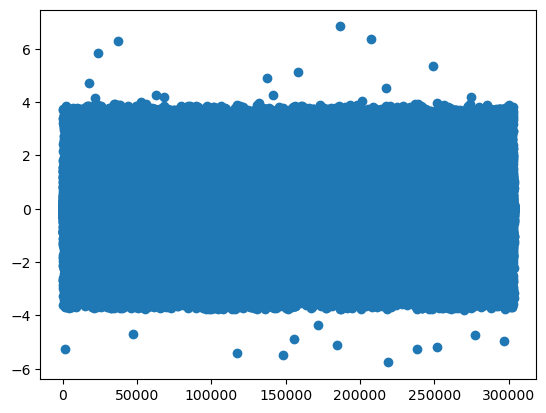

In [203]:
model_results = eval_models()

In [204]:
model_results

,r_score,Train_RMSE,Test_RMSE,Train_MAE,Test_MAE,best_params
LinearRegression,0.727179,1.206537,1.20232,0.980341,0.978341,{}
RandomForestRegressor,0.906464,0.697141,0.703995,0.281091,0.284648,"{'max_depth': 9, 'n_estimators': 45}"
XGBRegressor,0.907543,0.682491,0.699925,0.273731,0.281378,"{'learning_rate': 0.1, 'n_estimators': 710}"
